In [1]:
pip install pycountry

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\bapti\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


# 📚 1. Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
from geopy.extra.rate_limiter import RateLimiter
import time
import folium
import re
import pycountry
from wordcloud import WordCloud

# 📂 Task 1.1: Load and Inspect the Datasets

In [3]:
# Refugee Population Dataset
refugee_df = pd.read_csv('API_SM.POP.REFG.OR_DS2_en_csv_v2_24183.csv', skiprows=4)
refugee_df.head()

Country Name Country Code  \
0                        Aruba          ABW   
1  Africa Eastern and Southern          AFE   
2                  Afghanistan          AFG   
3   Africa Western and Central          AFW   
4                       Angola          AGO   

                                      Indicator Name  Indicator Code  \
0  Refugee population by country or territory of ...  SM.POP.REFG.OR   
1  Refugee population by country or territory of ...  SM.POP.REFG.OR   
2  Refugee population by country or territory of ...  SM.POP.REFG.OR   
3  Refugee population by country or territory of ...  SM.POP.REFG.OR   
4  Refugee population by country or territory of ...  SM.POP.REFG.OR   

       1960      1961      1962      1963      1964      1965  ...       2015  \
0       NaN       NaN       NaN       NaN       NaN       NaN  ...        NaN   
1       NaN       NaN       NaN       NaN       NaN       NaN  ...  4195068.0   
2       NaN       NaN       NaN       NaN       NaN       NaN  ...  2666294.0   
3       NaN       NaN       NaN       NaN       NaN       NaN  ...  1038377.0   
4  150000.0  150000.0  170000.0  175000.0  200000.0  220000.0  ...    11855.0   

        2016       2017       2018       2019       2020       2021  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1  4917140.0  6058091.0  5958200.0  5936536.0  5959979.0  6146257.0   
2  2501447.0  2624265.0  2681267.0  2727556.0  2594827.0  2712869.0   
3  1090726.0  1155918.0  1283440.0  1354330.0  1457853.0  1675916.0   
4     8388.0     8292.0     8243.0     8176.0     8196.0    11403.0   

        2022       2023  Unnamed: 68  
0        NaN        NaN          NaN  
1  6124318.0  6939594.0          NaN  
2  5661717.0  6403144.0          NaN  
3  1750586.0  1793223.0          NaN  
4    12021.0    11506.0          NaN  

[5 rows x 69 columns]

In [4]:
# Conflict Dataset
conflict_df = pd.read_csv('GEDEvent_v24_1.csv')
conflict_df.head()

C:\Users\bapti\AppData\Local\Temp\ipykernel_27712\3399575321.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  conflict_df = pd.read_csv('GEDEvent_v24_1.csv')


id               relid  year  active_year code_status  \
0  244657  IRQ-2017-1-524-322  2017            1       Clear   
1  412700  IRQ-2021-1-524-145  2021            1       Clear   
2  413023  IRQ-2021-1-524-143  2021            1       Clear   
3  412909  IRQ-2021-1-524-144  2021            1       Clear   
4  132140    AFG-1989-1-411-2  1989            1       Clear   

   type_of_violence  conflict_dset_id  conflict_new_id  \
0                 1               259              259   
1                 1               259              259   
2                 1               259              259   
3                 1               259              259   
4                 1               333              333   

             conflict_name  dyad_dset_id  ...                 date_end  \
0         Iraq: Government           524  ...  2017-07-31 00:00:00.000   
1         Iraq: Government           524  ...  2021-08-26 00:00:00.000   
2         Iraq: Government           524  ...  2021-08-28 00:00:00.000   
3         Iraq: Government           524  ...  2021-08-29 00:00:00.000   
4  Afghanistan: Government           724  ...  1989-01-13 00:00:00.000   

  deaths_a  deaths_b  deaths_civilians deaths_unknown  best  high  low  gwnoa  \
0        0         4                 0              2     6     6    6    645   
1       13         1               141             28   183   184  171    645   
2        0         2                 0              0     2     3    0    645   
3        0         0                10              0    10    10    9    645   
4        6         0                 0              0     6     6    6    700   

  gwnob  
0   NaN  
1   NaN  
2   NaN  
3   NaN  
4   NaN  

[5 rows x 49 columns]

In [5]:
# Tweets Dataset
tweets_df = pd.read_csv('tweets.csv')
tweets_df.head()

Unnamed: 0                                             tweets  \
0           0  ChatGPT: Optimizing Language Models for Dialog...   
1           1  Try talking with ChatGPT, our new AI system wh...   
2           2  ChatGPT: Optimizing Language Models for Dialog...   
3           3  THRILLED to share that ChatGPT, our new model ...   
4           4  As of 2 minutes ago, @OpenAI released their ne...   

              user_name              user_location  \
0            Rachel Roh  La Crescenta-Montrose, CA   
1           Albert Fong          San Francisco, CA   
2              eli🇱🇹🇪🇺👌                   Your Bed   
3         Charles Adler     Vancouver, BC - Canada   
4  Citizen News Channel                        NaN   

                                    user_description      user_created  \
0  Aggregator of Asian American news; scanning di...  08/04/2009 17:52   
1  Marketing dude, tech geek, heavy metal & '80s ...  21/09/2009 15:27   
2                                     heil, hydra 🖐☺  25/06/2020 23:30   
3  Hosting "CharlesAdlerTonight" Global News Radi...  10/09/2008 11:28   
4  Citizen News Channel bringing you an alternati...  23/04/2020 17:58   

   user_followers  user_friends  user_favourites  user_verified  \
0             405          1692             3247          False   
1             834           666              178          False   
2              10            88              155          False   
3           49165          3933            21853           True   
4             152           580             1473          False   

               date               source  retweets  favorites  is_retweet  
0  20/12/2020 06:06  Twitter for Android         0          0       False  
1  13/12/2020 16:27      Twitter Web App         1          1       False  
2  12/12/2020 20:33  Twitter for Android         0          0       False  
3  12/12/2020 20:23      Twitter Web App       446       2129       False  
4  12/12/2020 20:17   Twitter for iPhone         0          0       False

In [6]:
tweets_df.columns

Index(['Unnamed: 0', 'tweets', 'user_name', 'user_location',
       'user_description', 'user_created', 'user_followers', 'user_friends',
       'user_favourites', 'user_verified', 'date', 'source', 'retweets',
       'favorites', 'is_retweet'],
      dtype='object')

In [7]:
# World Boundaries Dataset
world_gdf = gpd.read_file("https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip")
print("\nWorld GeoDataFrame sample:")
world_gdf.head()


World GeoDataFrame sample:


featurecla  scalerank  LABELRANK                   SOVEREIGNT SOV_A3  \
0  Admin-0 country          1          6                         Fiji    FJI   
1  Admin-0 country          1          3  United Republic of Tanzania    TZA   
2  Admin-0 country          1          7               Western Sahara    SAH   
3  Admin-0 country          1          2                       Canada    CAN   
4  Admin-0 country          1          2     United States of America    US1   

   ADM0_DIF  LEVEL               TYPE TLC                        ADMIN  ...  \
0         0      2  Sovereign country   1                         Fiji  ...   
1         0      2  Sovereign country   1  United Republic of Tanzania  ...   
2         0      2      Indeterminate   1               Western Sahara  ...   
3         0      2  Sovereign country   1                       Canada  ...   
4         1      2            Country   1     United States of America  ...   

      FCLASS_TR     FCLASS_ID     FCLASS_PL FCLASS_GR  FCLASS_IT  \
0          None          None          None      None       None   
1          None          None          None      None       None   
2  Unrecognized  Unrecognized  Unrecognized      None       None   
3          None          None          None      None       None   
4          None          None          None      None       None   

      FCLASS_NL FCLASS_SE  FCLASS_BD FCLASS_UA  \
0          None      None       None      None   
1          None      None       None      None   
2  Unrecognized      None       None      None   
3          None      None       None      None   
4          None      None       None      None   

                                            geometry  
0  MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ...  
1  POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84 49, -122.97421 49.0025...  
4  MULTIPOLYGON (((-122.84 49, -120 49, -117.0312...  

[5 rows x 169 columns]

# 🧹 📘 Task 1.2 – Data Cleaning and Selection

In [8]:
# Cleaning Refugee Dataset
refugee_df = refugee_df[['Country Name', 'Country Code'] + [str(year) for year in range(1960, 2024)]]
refugee_df = refugee_df.dropna(how='all', subset=[str(year) for year in range(1960, 2024)])
refugee_df.head()

Country Name Country Code      1960      1961      1962  \
1  Africa Eastern and Southern          AFE       NaN       NaN       NaN   
2                  Afghanistan          AFG       NaN       NaN       NaN   
3   Africa Western and Central          AFW       NaN       NaN       NaN   
4                       Angola          AGO  150000.0  150000.0  170000.0   
5                      Albania          ALB       NaN       NaN       NaN   

       1963      1964      1965      1966      1967  ...       2014  \
1       NaN       NaN       NaN       NaN       NaN  ...  3559470.0   
2       NaN       NaN       NaN       NaN       NaN  ...  2596259.0   
3       NaN       NaN       NaN       NaN       NaN  ...   919751.0   
4  175000.0  200000.0  220000.0  303800.0  356200.0  ...     9468.0   
5       NaN     100.0    4860.0    4860.0    4260.0  ...    10156.0   

        2015       2016       2017       2018       2019       2020  \
1  4195068.0  4917140.0  6058091.0  5958200.0  5936536.0  5959979.0   
2  2666294.0  2501447.0  2624265.0  2681267.0  2727556.0  2594827.0   
3  1038377.0  1090726.0  1155918.0  1283440.0  1354330.0  1457853.0   
4    11855.0     8388.0     8292.0     8243.0     8176.0     8196.0   
5    10404.0    11060.0    12168.0    13512.0    15027.0    15523.0   

        2021       2022       2023  
1  6146257.0  6124318.0  6939594.0  
2  2712869.0  5661717.0  6403144.0  
3  1675916.0  1750586.0  1793223.0  
4    11403.0    12021.0    11506.0  
5    19847.0    20865.0    21919.0  

[5 rows x 66 columns]

#📘 Task 1.3 – Conflict Dataset Preparation

In [9]:
# --- Cleaning Conflict Dataset ---
conflict_df = conflict_df.dropna(subset=["year", "country"])
conflict_df['year'] = pd.to_numeric(conflict_df['year'], errors='coerce')
conflict_df = conflict_df[(conflict_df['year'] >= 1990) & (conflict_df['year'] <= 2023)]

conflict_summary = conflict_df.groupby(['country', 'year']).size().reset_index(name='Conflict_Count')
conflict_summary.head()

country  year  Conflict_Count
0  Afghanistan  1990              45
1  Afghanistan  1991              64
2  Afghanistan  1992              76
3  Afghanistan  1993             115
4  Afghanistan  1994             244


# 🧠 Task 1.4 - Merge for Geospatial Analysis
##And
# 🗺️ Task 2.1 - Choropleth Maps for 2000 and 2023 Refugee Population

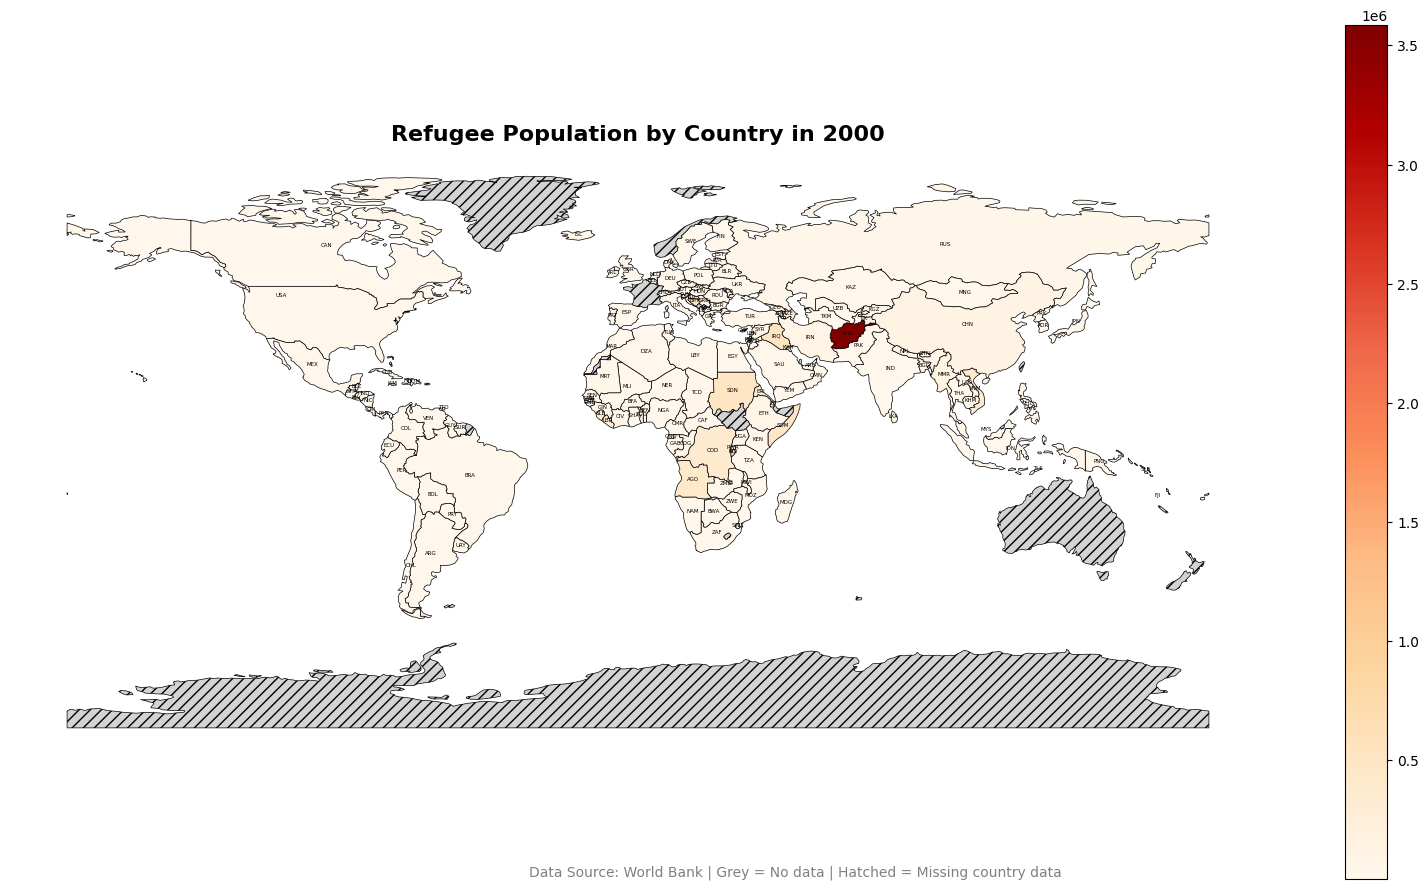

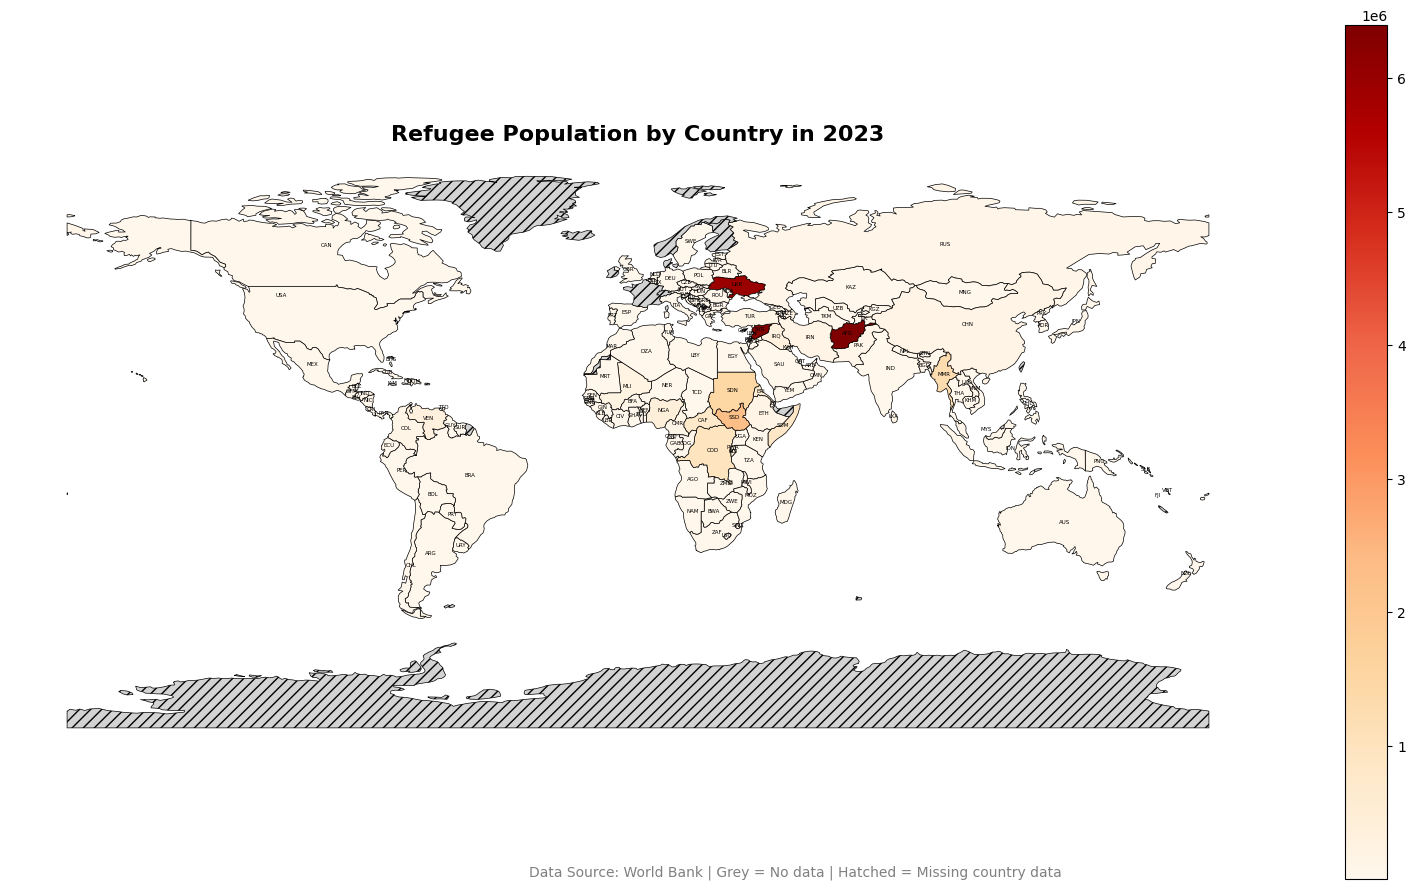

In [10]:
for year in ['2000', '2023']:
    map_data = refugee_df[['Country Code', year]]
    merged = world_gdf.merge(map_data, how='left', left_on='ISO_A3', right_on='Country Code')

    fig, ax = plt.subplots(1, 1, figsize=(16, 9))

    # Plot and capture colorbar
    choropleth = merged.plot(
        column=year,
        linewidth=0.5,
        edgecolor="black",
        ax=ax,
        cmap='OrRd',
        legend=True,
        missing_kwds={
            'color': 'lightgrey',
            'edgecolor': 'black',
            'hatch': '///',
            'label': 'No data'
        }
    )

    # ISO3 country code annotations
    for idx, row in merged.iterrows():
        if pd.notna(row[year]):
            # centroid for placing text
            if row['geometry'].geom_type == 'MultiPolygon':
                centroid = row['geometry'].centroid
            else:
                centroid = row['geometry'].centroid

            ax.annotate(text=row['ISO_A3'], xy=(centroid.x, centroid.y),
                        horizontalalignment='center', fontsize=4, color='black')

    # Title and axis
    ax.set_title(f'Refugee Population by Country in {year}', fontsize=16, fontweight='bold')
    ax.set_axis_off()

    # Footnote
    plt.figtext(0.5, 0.02,
                "Data Source: World Bank | Grey = No data | Hatched = Missing country data",
                wrap=True, horizontalalignment='center', fontsize=10, color='gray')

    plt.tight_layout()
    plt.show()

# 🗺️ Task 2.2 - Conflict vs Refugee Analysis

###Task 2.2.1: Countries with >5000 conflicts since 1993

In [11]:
conflict_totals = conflict_summary.groupby('country')['Conflict_Count'].sum()
high_conflict_countries = conflict_totals[conflict_totals > 5000].index


In [12]:
year_2020_data = refugee_df[refugee_df['Country Name'].isin(high_conflict_countries)][['Country Code', '2020']]
merged_high_conflict = world_gdf.merge(year_2020_data, how='left', left_on='ISO_A3', right_on='Country Code')


In [13]:
merged_high_conflict.head()

featurecla  scalerank  LABELRANK                   SOVEREIGNT SOV_A3  \
0  Admin-0 country          1          6                         Fiji    FJI   
1  Admin-0 country          1          3  United Republic of Tanzania    TZA   
2  Admin-0 country          1          7               Western Sahara    SAH   
3  Admin-0 country          1          2                       Canada    CAN   
4  Admin-0 country          1          2     United States of America    US1   

   ADM0_DIF  LEVEL               TYPE TLC                        ADMIN  ...  \
0         0      2  Sovereign country   1                         Fiji  ...   
1         0      2  Sovereign country   1  United Republic of Tanzania  ...   
2         0      2      Indeterminate   1               Western Sahara  ...   
3         0      2  Sovereign country   1                       Canada  ...   
4         1      2            Country   1     United States of America  ...   

      FCLASS_PL  FCLASS_GR FCLASS_IT     FCLASS_NL  FCLASS_SE FCLASS_BD  \
0          None       None      None          None       None      None   
1          None       None      None          None       None      None   
2  Unrecognized       None      None  Unrecognized       None      None   
3          None       None      None          None       None      None   
4          None       None      None          None       None      None   

  FCLASS_UA                                           geometry Country Code  \
0      None  MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ...          NaN   
1      None  POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3...          NaN   
2      None  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...          NaN   
3      None  MULTIPOLYGON (((-122.84 49, -122.97421 49.0025...          NaN   
4      None  MULTIPOLYGON (((-122.84 49, -120 49, -117.0312...          NaN   

  2020  
0  NaN  
1  NaN  
2  NaN  
3  NaN  
4  NaN  

[5 rows x 171 columns]

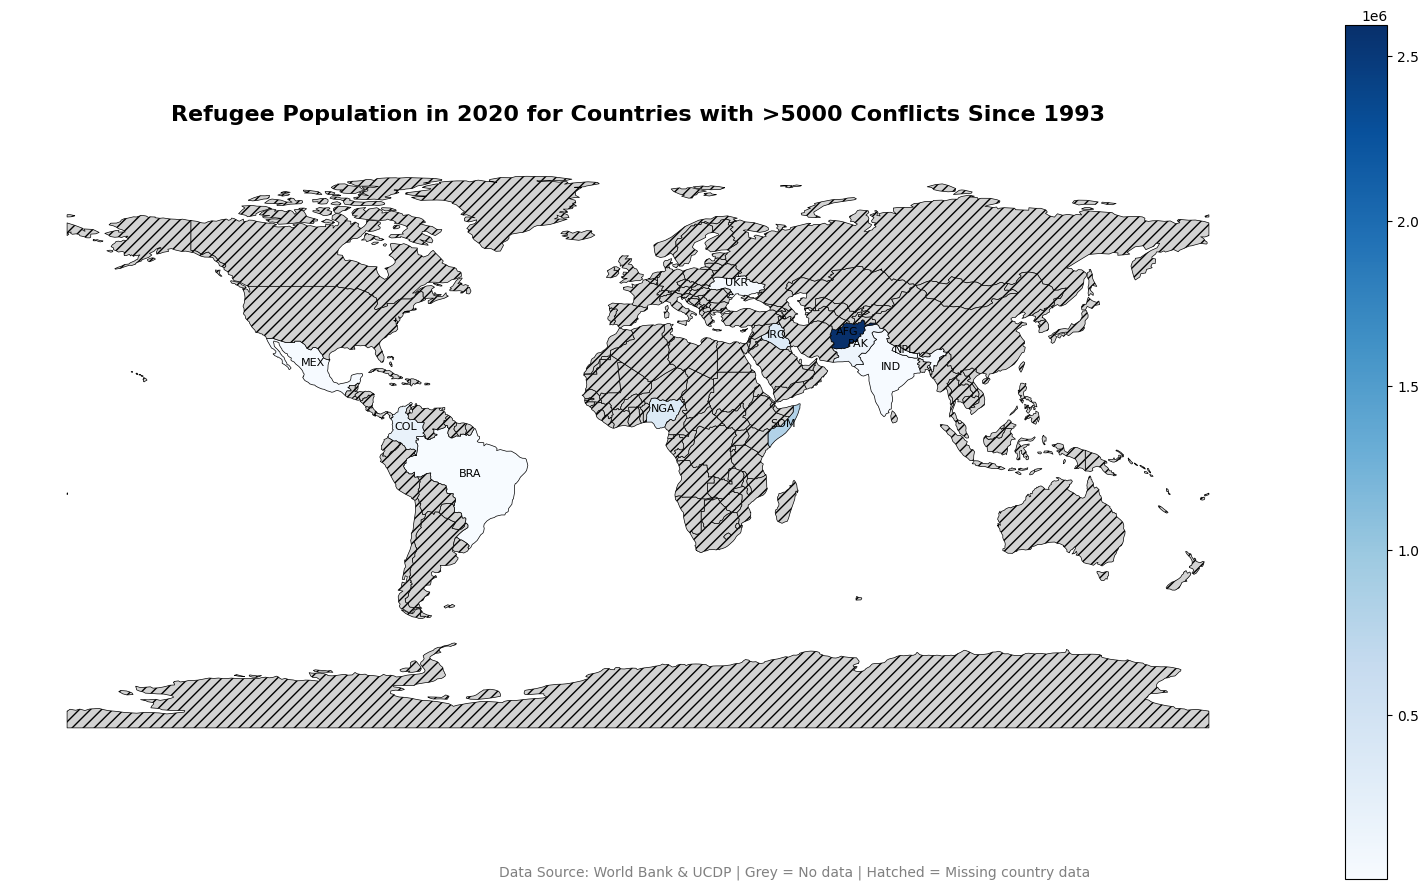

In [14]:
fig, ax = plt.subplots(figsize=(16, 9))

# Plot with visual styling
merged_high_conflict.plot(
    column='2020',
    cmap='Blues',
    linewidth=0.5,
    edgecolor="black",
    legend=True,
    ax=ax,
    missing_kwds={
        'color': 'lightgrey',
        'edgecolor': 'black',
        'hatch': '///',
        'label': 'No data'
    }
)

# Title
ax.set_title('Refugee Population in 2020 for Countries with >5000 Conflicts Since 1993',
             fontsize=16, fontweight='bold', pad=20)

# Axis off
ax.set_axis_off()

# footnote
plt.figtext(0.5, 0.02,
            "Data Source: World Bank & UCDP | Grey = No data | Hatched = Missing country data",
            wrap=True, horizontalalignment='center', fontsize=10, color='gray')

for idx, row in merged_high_conflict.iterrows():
    if not pd.isna(row['2020']):
        centroid = row['geometry'].centroid
        ax.text(centroid.x, centroid.y, row['ISO_A3'], ha='center', fontsize=8, color='black')

plt.tight_layout()
plt.show()

###Task 2.2.2: Middle East countries with >50,000 Refugees

In [15]:
# ISO3 codes for Middle Eastern countries
middle_east_iso3 = [
    'SYR', 'IRQ', 'IRN', 'SAU', 'ISR', 'JOR', 'LBN', 'YEM',
    'ARE', 'QAT', 'OMN', 'BHR', 'KWT'
]

# Filtering refugee data using ISO3 and 2020 threshold
middle_east_data = refugee_df[
    (refugee_df['Country Code'].isin(middle_east_iso3)) &
    (refugee_df['2020'] > 50000)
][['Country Code', '2020']]

# Merging with world map on ISO3
merged_middle_east = world_gdf.merge(
    middle_east_data,
    how='left',
    left_on='ISO_A3',
    right_on='Country Code'
)

In [16]:
# Createing a base folium map centered around the Middle East
m = folium.Map(location=[30, 45], zoom_start=4, tiles='cartodbpositron')  # Lighter background, better contrast

# Converting GeoDataFrame to GeoJSON
geojson_data = merged_middle_east.to_json()

# Choropleth Layer
folium.Choropleth(
    geo_data=geojson_data,
    data=merged_middle_east,
    columns=['ISO_A3', '2020'],
    key_on='feature.properties.ISO_A3',
    fill_color='Reds',
    fill_opacity=0.8,
    line_opacity=0.4,
    nan_fill_color='lightgrey',
    legend_name='Refugee Population (2020)',
    highlight=True,
    name='Refugee Choropleth'
).add_to(m)

# GeoJson with styled tooltips
folium.GeoJson(
    geojson_data,
    name="Country Info",
    tooltip=folium.features.GeoJsonTooltip(
        fields=['NAME', '2020'],
        aliases=['Country:', 'Refugee Population (2020):'],
        localize=True,
        sticky=True,
        labels=True,
        style=(
            "background-color: white; "
            "color: #333333; "
            "font-family: Arial; "
            "font-size: 12px; "
            "padding: 5px;"
        )
    ),
    style_function=lambda feature: {
        'fillColor': '#00000000',
        'color': 'black',
        'weight': 0.5,
        'dashArray': '5, 5'
    },
    highlight_function=lambda x: {
        'weight': 3,
        'fillOpacity': 0.9,
    }
).add_to(m)

# layer control for interactivity
folium.LayerControl().add_to(m)

# Show map
m


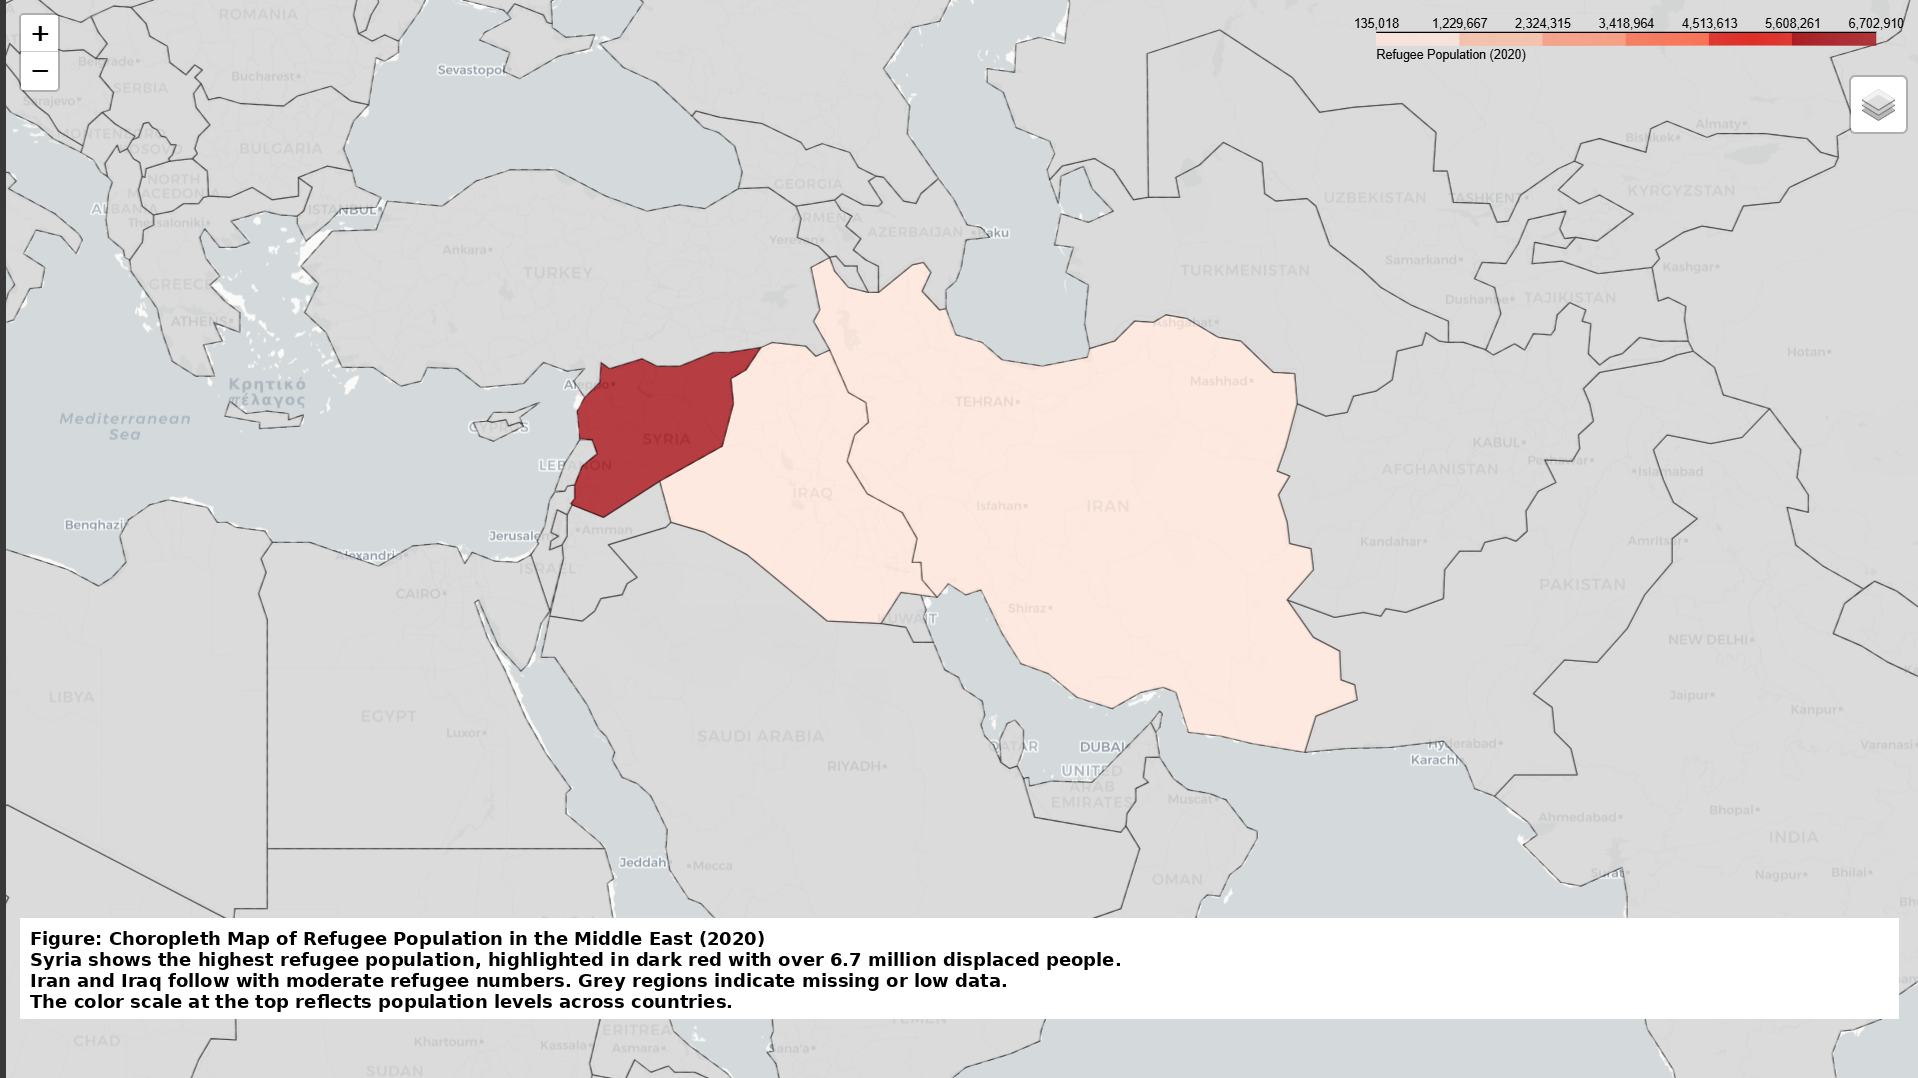

###Task 2.2.3: Top 10 Refugee Countries

In [17]:
# Get Top 10 Refugee Countries
valid_country_codes = set(world_gdf['ISO_A3'].dropna())
refugee_countries_only = refugee_df[refugee_df['Country Code'].isin(valid_country_codes)]

In [18]:
top10_refugees = refugee_countries_only.set_index('Country Name')[list(map(str, range(1993, 2024)))].sum(axis=1).sort_values(ascending=False).head(10)
top10_countries = top10_refugees.index.tolist()

In [19]:
# Manual mapping between refugee names and conflict dataset names
mapping = {
    "Syrian Arab Republic": "Syria",
    "Venezuela, RB": "Venezuela",
    "Iran, Islamic Rep.": "Iran",
    "Congo, Dem. Rep.": "DR Congo (Zaire)",
    "Russian Federation": "Russia (Soviet Union)",
    "Myanmar": "Myanmar (Burma)"
}
mapped_countries = [mapping.get(c, c) for c in top10_countries]

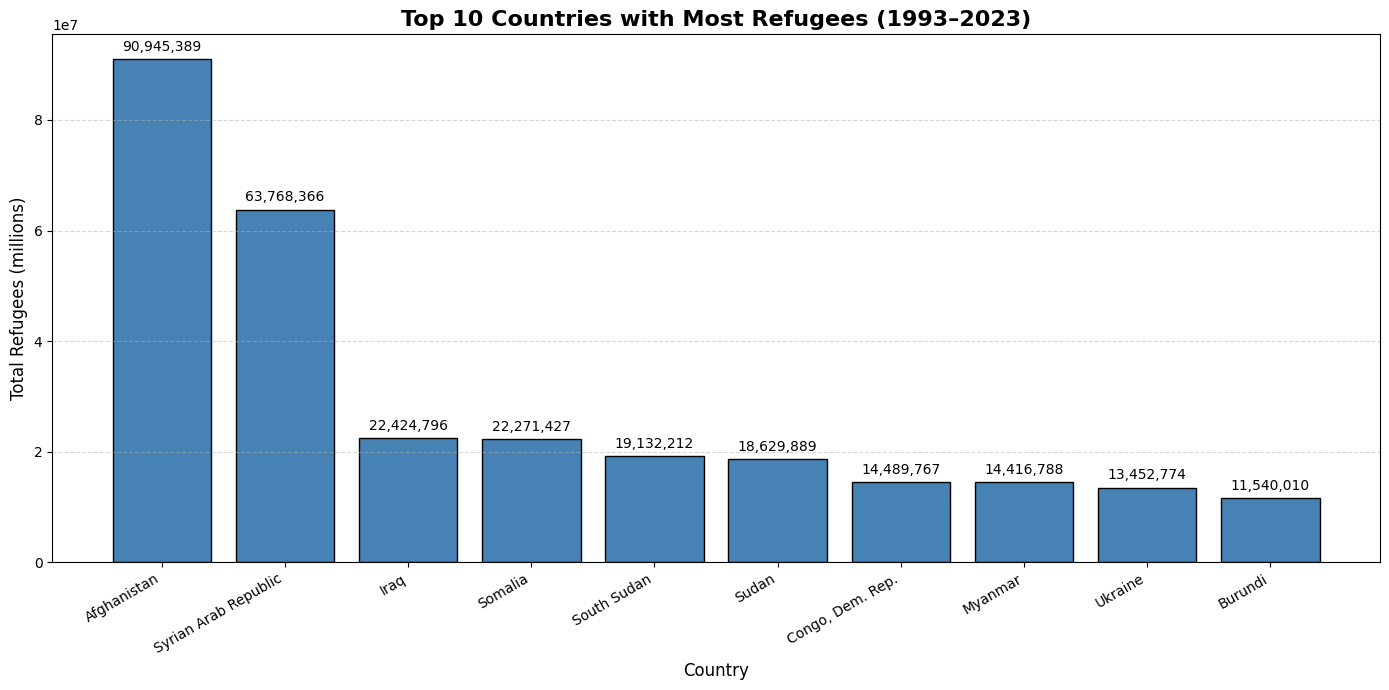

In [20]:
# Sort and prepare data just in case
top10_refugees = top10_refugees.sort_values(ascending=False)

# Creating figure
plt.figure(figsize=(14, 7))
bars = plt.bar(top10_refugees.index, top10_refugees.values, color='steelblue', edgecolor='black')

# value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 1e6, f'{int(yval):,}', ha='center', va='bottom', fontsize=10)

# Title and labels
plt.title('Top 10 Countries with Most Refugees (1993–2023)', fontsize=16, fontweight='bold')
plt.ylabel('Total Refugees (millions)', fontsize=12)
plt.xlabel('Country', fontsize=12)

# Rotate x labels
plt.xticks(rotation=30, ha='right')

# Clean layout
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [21]:
# Conflicts for Top 10
conflict_top10 = conflict_summary[conflict_summary['country'].isin(mapped_countries)].groupby('country')['Conflict_Count'].sum()
print("\nConflicts for Top 10 Refugee Countries:\n")
conflict_top10


Conflicts for Top 10 Refugee Countries:



country
Afghanistan         41874
Burundi              3091
DR Congo (Zaire)     8072
Iraq                 9057
Myanmar (Burma)      7337
Somalia              6660
South Sudan           985
Sudan                3789
Syria               86755
Ukraine             17536
Name: Conflict_Count, dtype: int64

###Task 2.2.4: % Change for Highest Conflict Country

In [22]:
highest_conflict_country = conflict_totals.idxmax()

In [23]:
# Reverse map to get refugee dataset name
reverse_mapping = {
    "Syria": "Syrian Arab Republic",
    "Venezuela": "Venezuela, RB",
    "Iran": "Iran, Islamic Rep.",
    "DR Congo (Zaire)": "Congo, Dem. Rep.",
    "Russia (Soviet Union)": "Russian Federation",
    "Myanmar (Burma)": "Myanmar"
}
refugee_country_name = reverse_mapping.get(highest_conflict_country, highest_conflict_country)

In [24]:
refugee_country_data = refugee_df[refugee_df['Country Name'] == refugee_country_name]
refugee_country_data = refugee_country_data.loc[:, '2003':'2023'].T
refugee_country_data = refugee_country_data.rename(columns={refugee_country_data.columns[0]: 'Refugees'})


In [25]:
refugee_country_data['Pct_Change'] = refugee_country_data['Refugees'].pct_change() * 100


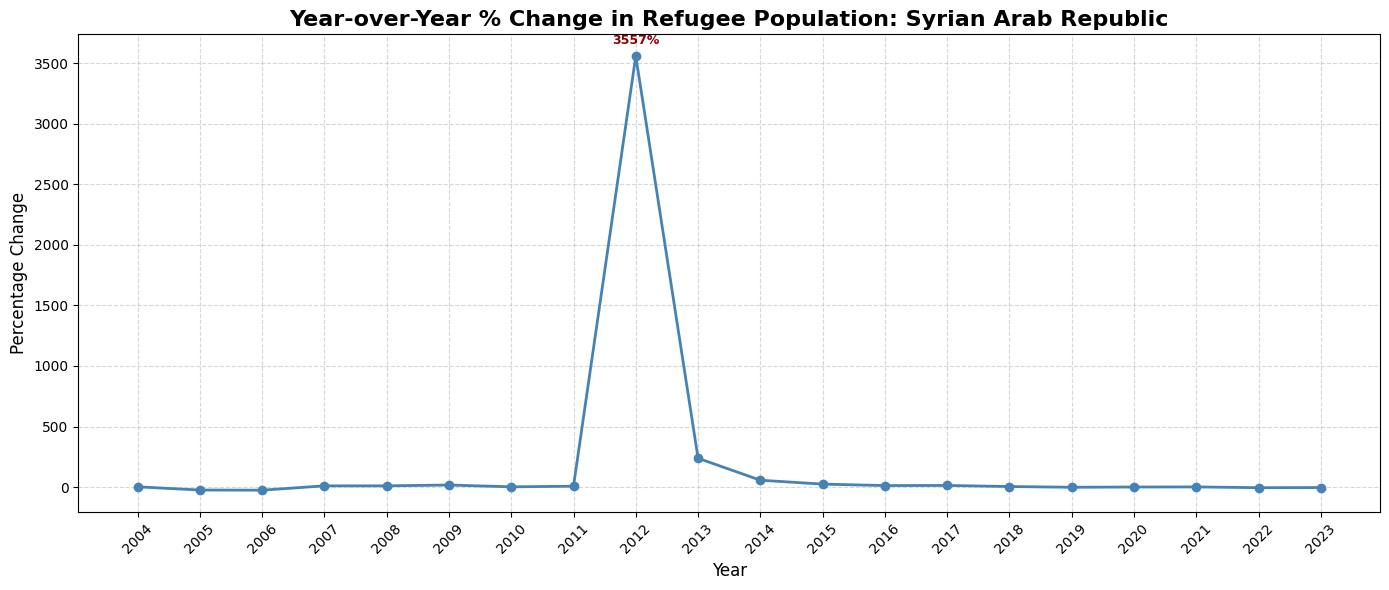

In [26]:
# Plot setup
plt.figure(figsize=(14, 6))
plt.plot(refugee_country_data.index, refugee_country_data['Pct_Change'], marker='o', color='steelblue', linewidth=2)

# Title and labels
plt.title(f'Year-over-Year % Change in Refugee Population: {refugee_country_name}', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage Change', fontsize=12)

# Grid
plt.grid(True, linestyle='--', alpha=0.5)

# Highlight key spikes (if over threshold)
for year, pct in refugee_country_data['Pct_Change'].items():
    if pct > 1000:  # adjust threshold as needed
        plt.text(year, pct + 100, f'{int(pct)}%', ha='center', color='darkred', fontsize=9, fontweight='bold')

# Formatting
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###Task 2.2.5: Mean Refugees vs Mean Conflicts

In [27]:
mean_refugees = refugee_countries_only.set_index('Country Name')[list(map(str, range(1990, 2024)))].mean(axis=1)
mean_conflicts = conflict_summary.groupby('country')['Conflict_Count'].mean()


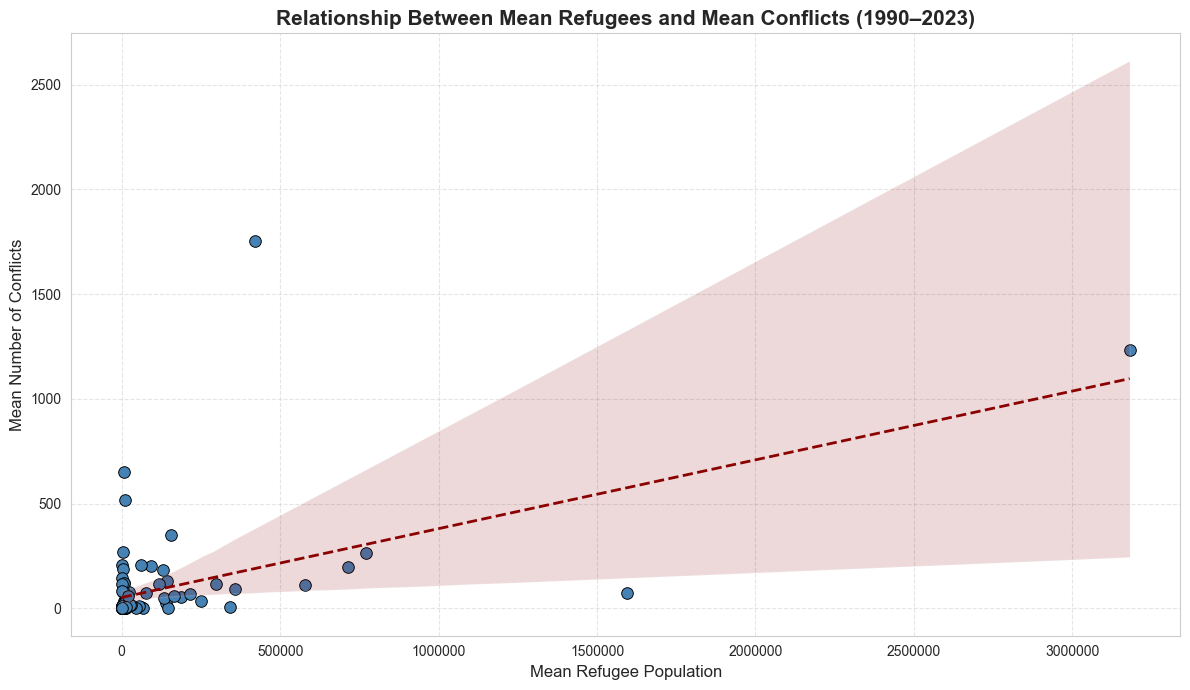

In [28]:
scatter_df = pd.DataFrame({'Mean_Refugees': mean_refugees, 'Mean_Conflicts': mean_conflicts}).dropna()
# Prepare figure
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

# Base scatterplot
sns.scatterplot(
    data=scatter_df,
    x='Mean_Refugees',
    y='Mean_Conflicts',
    s=70,
    color='steelblue',
    edgecolor='black'
)

# regression trendline
sns.regplot(
    data=scatter_df,
    x='Mean_Refugees',
    y='Mean_Conflicts',
    scatter=False,
    color='darkred',
    line_kws={"linestyle": "--", "linewidth": 2}
)

# Titles and labels
plt.title('Relationship Between Mean Refugees and Mean Conflicts (1990–2023)', fontsize=15, fontweight='bold')
plt.xlabel('Mean Refugee Population', fontsize=12)
plt.ylabel('Mean Number of Conflicts', fontsize=12)

# scientific notation or K/M scaling
plt.ticklabel_format(style='plain', axis='x')  # prevent scientific format
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 🧹Task 3 - Twitter Sentiment Analysis

###Task 3.1: Preprocessing


In [29]:
# Filter by verified, followers >=100, and location available
tweets_df = tweets_df[
    (tweets_df['user_verified'] == True) &
    (tweets_df['user_followers'] >= 100) &
    (tweets_df['user_location'].notnull())
]

In [30]:
# Clean tweets (re-cleaning to be safe)
def clean_tweet(tweet):
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    tweet = re.sub(r'\@\w+|\#', '', tweet)
    tweet = re.sub(r'[^\w\s]', '', tweet)
    return tweet.strip()

tweets_df['clean_text'] = tweets_df['tweets'].astype(str).apply(clean_tweet)


In [31]:
tweets_df

Unnamed: 0                                             tweets  \
3               3  THRILLED to share that ChatGPT, our new model ...   
12             12  ChatGPT: Optimizing Language Models for Dialog...   
15             15  #AI #techforgood ChatGPT: Optimizing Language ...   
17             17  #ai Models are set to become the search engine...   
22             22  OpenAI ChatGPT: Optimizing Language Models for...   
...           ...                                                ...   
10898       10898  We will probably need to arm teachers with rea...   
10913       10913  ChatGPT is definitely the best thing that has ...   
10936       10936  A mind-blowingly great explanation by ChatGPT!...   
10986       10986  Asking ChatGPT about a thought experiment to d...   
10993       10993  I asked ChatGPT to write me a twitter thread a...   

               user_name           user_location  \
3          Charles Adler  Vancouver, BC - Canada   
12                  WION                   India   
15             City A.M.         London, England   
17                 ILKHA                 Türkiye   
22             City A.M.         London, England   
...                  ...                     ...   
10898     Sushmita Panda            Delhi, India   
10913  New Straits Times                Malaysia   
10936      Ido Daniel 🇮🇱                  Israel   
10986  New Straits Times                Malaysia   
10993  New Straits Times                Malaysia   

                                        user_description      user_created  \
3      Hosting "CharlesAdlerTonight" Global News Radi...  10/09/2008 11:28   
12     #WION: World Is One | Welcome to India’s first...  21/03/2016 03:44   
15     London's business newspaper - News, Opinion, a...  09/06/2009 13:53   
17        Official Twitter account of Ilke News Agency /  22/05/2015 08:31   
22     London's business newspaper - News, Opinion, a...  09/06/2009 13:53   
...                                                  ...               ...   
10898  India Correspondent @sputnikint | Covering Hea...  01/08/2011 08:09   
10913  News, views and up-to-date reports from Malays...  09/07/2009 09:04   
10936  Israeli Jew with Turkish and Iraqi roots. Digi...  05/08/2011 13:10   
10986  News, views and up-to-date reports from Malays...  09/07/2009 09:04   
10993  News, views and up-to-date reports from Malays...  09/07/2009 09:04   

       user_followers  user_friends  user_favourites  user_verified  \
3               49165          3933            21853           True   
12             292510            91             7531           True   
15              66224           603              771           True   
17               4056             6                3           True   
22              66224           603              771           True   
...               ...           ...              ...            ...   
10898            2442           482            17039           True   
10913          768062           431             1087           True   
10936           19880          1435             7278           True   
10986          768491           431             1087           True   
10993          768491           431             1087           True   

                   date               source  retweets  favorites  is_retweet  \
3      12/12/2020 20:23      Twitter Web App       446       2129       False   
12     12/12/2020 17:45            TweetDeck         0         18       False   
15     12/12/2020 16:00   Twitter for iPhone         0          1       False   
17     12/12/2020 15:38            TweetDeck         3          5       False   
22     12/12/2020 14:59               Buffer         1          0       False   
...                 ...                  ...       ...        ...         ...   
10898  11/11/2021 16:35  Twitter for Android         0          0       False   
10913  10/11/2021 01:37            TweetDeck         1          3       False  

###Task 3.2: Geocoding

In [32]:
geolocator = Nominatim(user_agent="MSc23")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
def geocode(location):
    try:
        loc = geolocator.geocode(location, timeout=10)
        return pd.Series([loc.latitude, loc.longitude]) if loc else pd.Series([np.nan, np.nan])
    except:
        return pd.Series([np.nan, np.nan])

tweets_df[['latitude', 'longitude']] = tweets_df['user_location'].apply(geocode)


##### 🧹 Clean after Geocoding

In [33]:
# Drop tweets where geocoding failed (lat/lon are NaN)
tweets_df = tweets_df.dropna(subset=['latitude', 'longitude'])

In [34]:
tweets_df

Unnamed: 0                                             tweets  \
3               3  THRILLED to share that ChatGPT, our new model ...   
12             12  ChatGPT: Optimizing Language Models for Dialog...   
15             15  #AI #techforgood ChatGPT: Optimizing Language ...   
17             17  #ai Models are set to become the search engine...   
22             22  OpenAI ChatGPT: Optimizing Language Models for...   
...           ...                                                ...   
10898       10898  We will probably need to arm teachers with rea...   
10913       10913  ChatGPT is definitely the best thing that has ...   
10936       10936  A mind-blowingly great explanation by ChatGPT!...   
10986       10986  Asking ChatGPT about a thought experiment to d...   
10993       10993  I asked ChatGPT to write me a twitter thread a...   

               user_name           user_location  \
3          Charles Adler  Vancouver, BC - Canada   
12                  WION                   India   
15             City A.M.         London, England   
17                 ILKHA                 Türkiye   
22             City A.M.         London, England   
...                  ...                     ...   
10898     Sushmita Panda            Delhi, India   
10913  New Straits Times                Malaysia   
10936      Ido Daniel 🇮🇱                  Israel   
10986  New Straits Times                Malaysia   
10993  New Straits Times                Malaysia   

                                        user_description      user_created  \
3      Hosting "CharlesAdlerTonight" Global News Radi...  10/09/2008 11:28   
12     #WION: World Is One | Welcome to India’s first...  21/03/2016 03:44   
15     London's business newspaper - News, Opinion, a...  09/06/2009 13:53   
17        Official Twitter account of Ilke News Agency /  22/05/2015 08:31   
22     London's business newspaper - News, Opinion, a...  09/06/2009 13:53   
...                                                  ...               ...   
10898  India Correspondent @sputnikint | Covering Hea...  01/08/2011 08:09   
10913  News, views and up-to-date reports from Malays...  09/07/2009 09:04   
10936  Israeli Jew with Turkish and Iraqi roots. Digi...  05/08/2011 13:10   
10986  News, views and up-to-date reports from Malays...  09/07/2009 09:04   
10993  News, views and up-to-date reports from Malays...  09/07/2009 09:04   

       user_followers  user_friends  user_favourites  user_verified  \
3               49165          3933            21853           True   
12             292510            91             7531           True   
15              66224           603              771           True   
17               4056             6                3           True   
22              66224           603              771           True   
...               ...           ...              ...            ...   
10898            2442           482            17039           True   
10913          768062           431             1087           True   
10936           19880          1435             7278           True   
10986          768491           431             1087           True   
10993          768491           431             1087           True   

                   date               source  retweets  favorites  is_retweet  \
3      12/12/2020 20:23      Twitter Web App       446       2129       False   
12     12/12/2020 17:45            TweetDeck         0         18       False   
15     12/12/2020 16:00   Twitter for iPhone         0          1       False   
17     12/12/2020 15:38            TweetDeck         3          5       False   
22     12/12/2020 14:59               Buffer         1          0       False   
...                 ...                  ...       ...        ...         ...   
10898  11/11/2021 16:35  Twitter for Android         0          0       False   
10913  10/11/2021 01:37            TweetDeck         1          3       False  

In [35]:
# Now sample 500 tweets randomly
tweets_df = tweets_df.sample(n=500, random_state=42)

In [36]:
tweets_df

Unnamed: 0                                             tweets  \
1450        1450  My priorities with ChatGPT. https://t.co/2rx8A...   
2528        2528  ChatGPT won't replace StackOverflow anytime so...   
1314        1314  Some of these chatGPT demonstrations are just ...   
6226        6226  Unlike most intelligent people, #ChatGPT has t...   
6387        6387  Thanks ChatGPT for helping me code. Now I can ...   
...          ...                                                ...   
879          879  What good is AI if it can't predict the future...   
1353        1353  (@)gabrielayuso:\nWTF! ChatGPT is impressive b...   
2644        2644  hilarious you can so simply manufacture consen...   
7539        7539  is this the end?\nShould we be afraid?\n#ChatG...   
6915        6915  Content creators SHOULD use tools like these t...   

                user_name                user_location  \
1450   The Logical Indian                        India   
2528     Rachel Middleton         Canary Wharf, London   
1314    New Straits Times                     Malaysia   
6226    New Straits Times                     Malaysia   
6387                CCTV+               Beijing, CHINA   
...                   ...                          ...   
879              Ubah Ali                Rochester, MN   
1353           Ian Bailey  Vancouver, British Columbia   
2644                ILKHA                      Türkiye   
7539  The Peninsula Qatar                        Qatar   
6915  The Peninsula Qatar                        Qatar   

                                       user_description      user_created  \
1450  Handpicked, newsworthy stories which deserve t...  27/12/2013 19:58   
2528  Stints in international news wires across the ...  12/08/2015 01:12   
1314  News, views and up-to-date reports from Malays...  09/07/2009 09:04   
6226  News, views and up-to-date reports from Malays...  09/07/2009 09:04   
6387  CCTV+ is a leading video news agency in China ...  16/01/2015 04:52   
...                                                 ...               ...   
879   Journalist @KTTCTV/@FOX47Roch | Engaged-Storyt...  08/09/2014 15:32   
1353  Vancouver-based Globe & Mail reporter. Retweet...  11/11/2009 19:50   
2644     Official Twitter account of Ilke News Agency /  22/05/2015 08:31   
7539  The official account of The Peninsula English ...  25/07/2009 08:41   
6915  The official account of The Peninsula English ...  25/07/2009 08:41   

      user_followers  user_friends  user_favourites  user_verified  \
1450           88777          2072             2479           True   
2528             428           590                8           True   
1314          732499           423              931           True   
6226          740609           428              954           True   
6387           28407           271              346           True   
...              ...           ...              ...            ...   
879             1095           202              930           True   
1353           13145          5492             5484           True   
2644            4306             6                3           True   
7539           53405           222              775           True   
6915           52971           240              775           True   

                  date              source  retweets  favorites  is_retweet  \
1450  22/12/2020 08:56           TweetDeck         0          3       False   
2528  06/01/2021 01:01     Twitter Web App         1          1       False   
1314  23/12/2020 10:46           TweetDeck         2          4       False   
6226  25/02/2021 10:04           TweetDeck         2          2       False   
6387  02/03/2021 03:28     Twitter Web App         0          3       False   
...                ...                 ...       ...        ...         ...   
879   18/12/2020 16:43  Twitter for iPhone         0          2       False   
1353  22/12/2020 23:59           TweetDeck         3      

###Task 3.3: Polarity Analysis

In [37]:
# calculating polarity
tweets_df['polarity'] = tweets_df['clean_text'].apply(lambda x: TextBlob(x).sentiment.polarity)


In [38]:
# Group polarity by location
polarity_summary = tweets_df.groupby(['latitude', 'longitude']).agg({'polarity': 'mean'}).reset_index()

In [39]:
# Center map based on average location of tweets
avg_lat = tweets_df['latitude'].mean()
avg_lon = tweets_df['longitude'].mean()

polarity_map = folium.Map(location=[avg_lat, avg_lon], zoom_start=2.5, tiles='cartodbpositron')

# Function to get color based on polarity value
def get_color(p):
    if p > 0.5:
        return 'darkgreen'
    elif p > 0:
        return 'green'
    elif p == 0:
        return 'gray'
    elif p > -0.5:
        return 'orange'
    else:
        return 'red'

# Plot markers
for _, row in tweets_df.iterrows():
    polarity = row['polarity']
    color = get_color(polarity)
    radius = 4 + abs(polarity) * 6  # radius scales with sentiment intensity

    tooltip_html = f"""
    <div style='font-size:12px; max-width:300px; white-space:normal;'>
        <b>Tweet:</b> {row['clean_text']}<br>
        <b>Polarity:</b> {polarity:.2f}
    </div>
    """

    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=radius,
        color=color,
        tooltip=tooltip_html,
        fill=True,
        fill_opacity=0.8
    ).add_to(polarity_map)

polarity_map

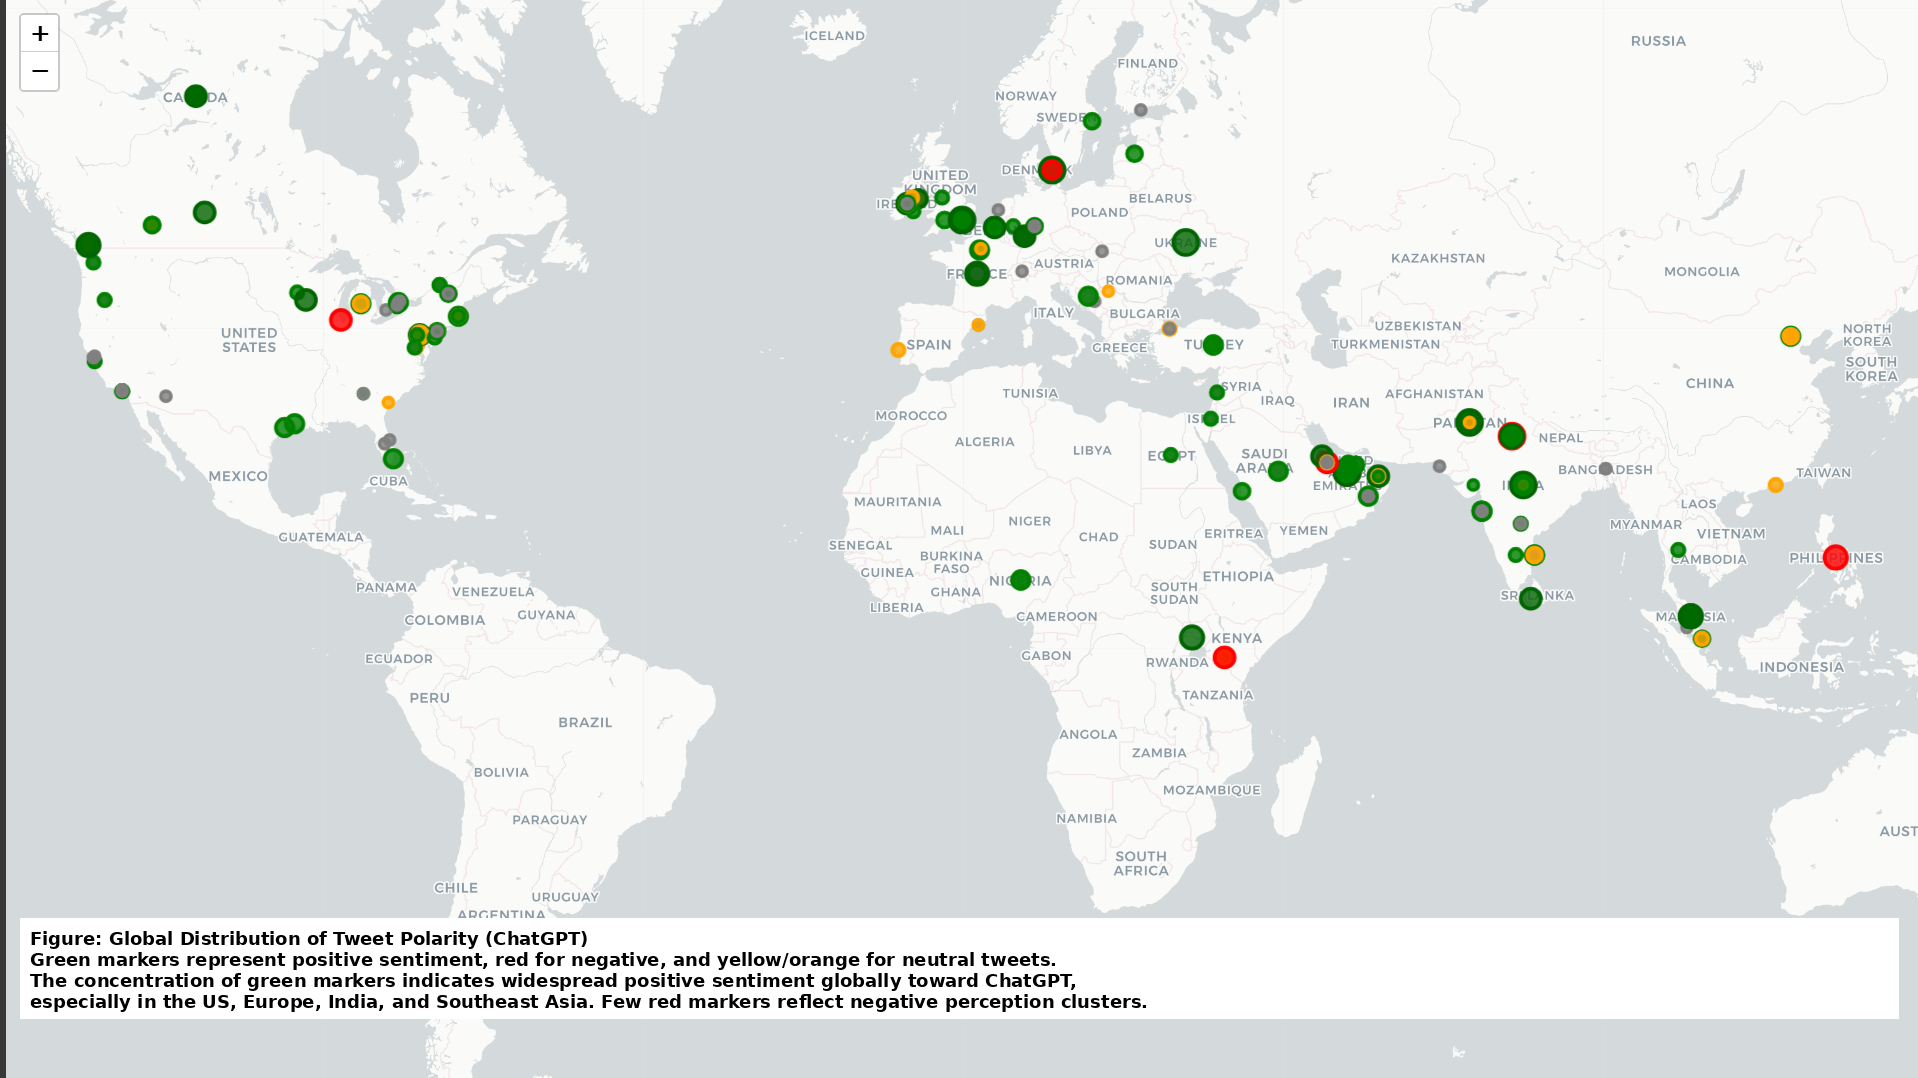

C:\Users\bapti\AppData\Local\Temp\ipykernel_27712\218493331.py:5: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  tweets_df['date'] = pd.to_datetime(tweets_df['date'])


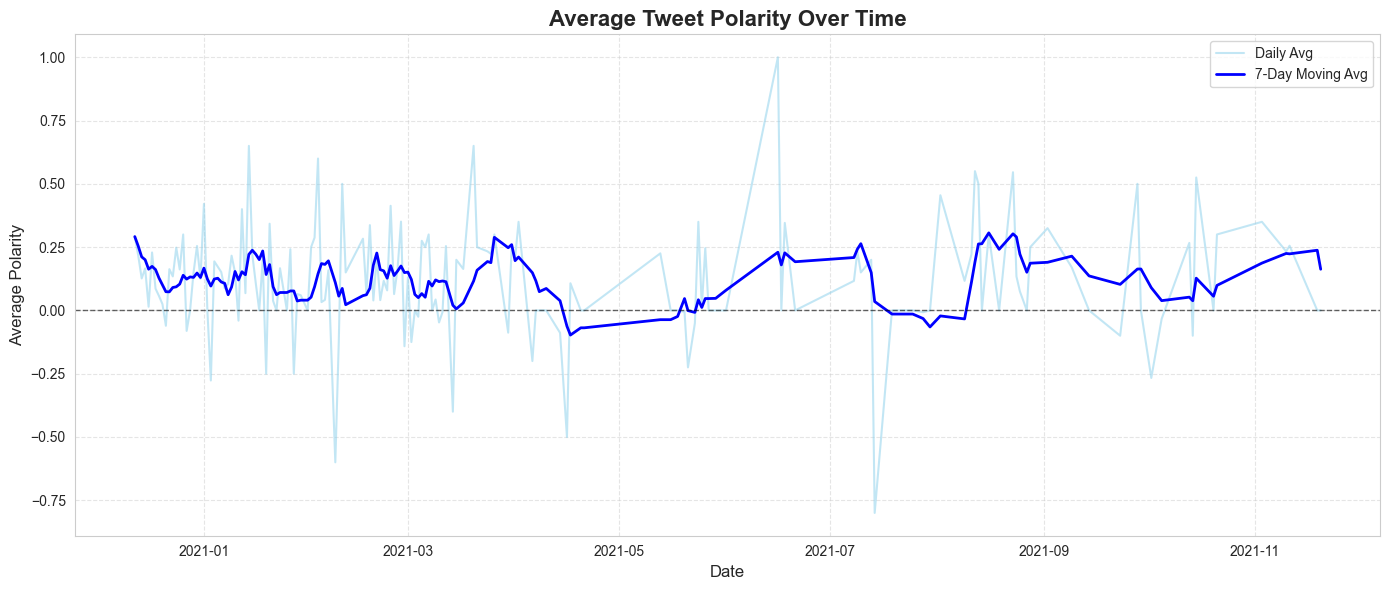

In [40]:
# Set style
sns.set_style("whitegrid")

# Calculate polarity trend
tweets_df['date'] = pd.to_datetime(tweets_df['date'])
daily_avg = tweets_df.groupby(tweets_df['date'].dt.date)['polarity'].mean()

# smooth with rolling average
smoothed = daily_avg.rolling(window=7, min_periods=1).mean()

# Plot
plt.figure(figsize=(14, 6))
plt.plot(daily_avg.index, daily_avg.values, label='Daily Avg', color='skyblue', alpha=0.5)
plt.plot(smoothed.index, smoothed.values, label='7-Day Moving Avg', color='blue', linewidth=2)

# Titles and labels
plt.title('Average Tweet Polarity Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Polarity', fontsize=12)
plt.axhline(0, linestyle='--', color='black', linewidth=1, alpha=0.6)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 📈 Task 3.4: Subjectivity Analysis

In [41]:
# calculating subjectivity
tweets_df['subjectivity'] = tweets_df['clean_text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)


In [42]:
# Group subjectivity by location
subjectivity_summary = tweets_df.groupby(['latitude', 'longitude']).agg({'subjectivity': 'mean'}).reset_index()


In [43]:
# Center map based on average tweet coordinates
avg_lat = tweets_df['latitude'].mean()
avg_lon = tweets_df['longitude'].mean()

subjectivity_map = folium.Map(location=[avg_lat, avg_lon], zoom_start=2.5, tiles='cartodbpositron')

# Plot each tweet with subjectivity
for _, row in tweets_df.iterrows():
    subj = row['subjectivity']
    radius = 4 + subj * 6  # Subjectivity from 0 to 1, scaled for radius

    tooltip_html = f"""
    <div style='font-size:12px; max-width:300px; white-space:normal;'>
        <b>Tweet:</b> {row['clean_text']}<br>
        <b>Subjectivity:</b> {subj:.2f}
    </div>
    """

    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=radius,
        color='blue',
        tooltip=tooltip_html,
        fill=True,
        fill_opacity=0.8
    ).add_to(subjectivity_map)

subjectivity_map

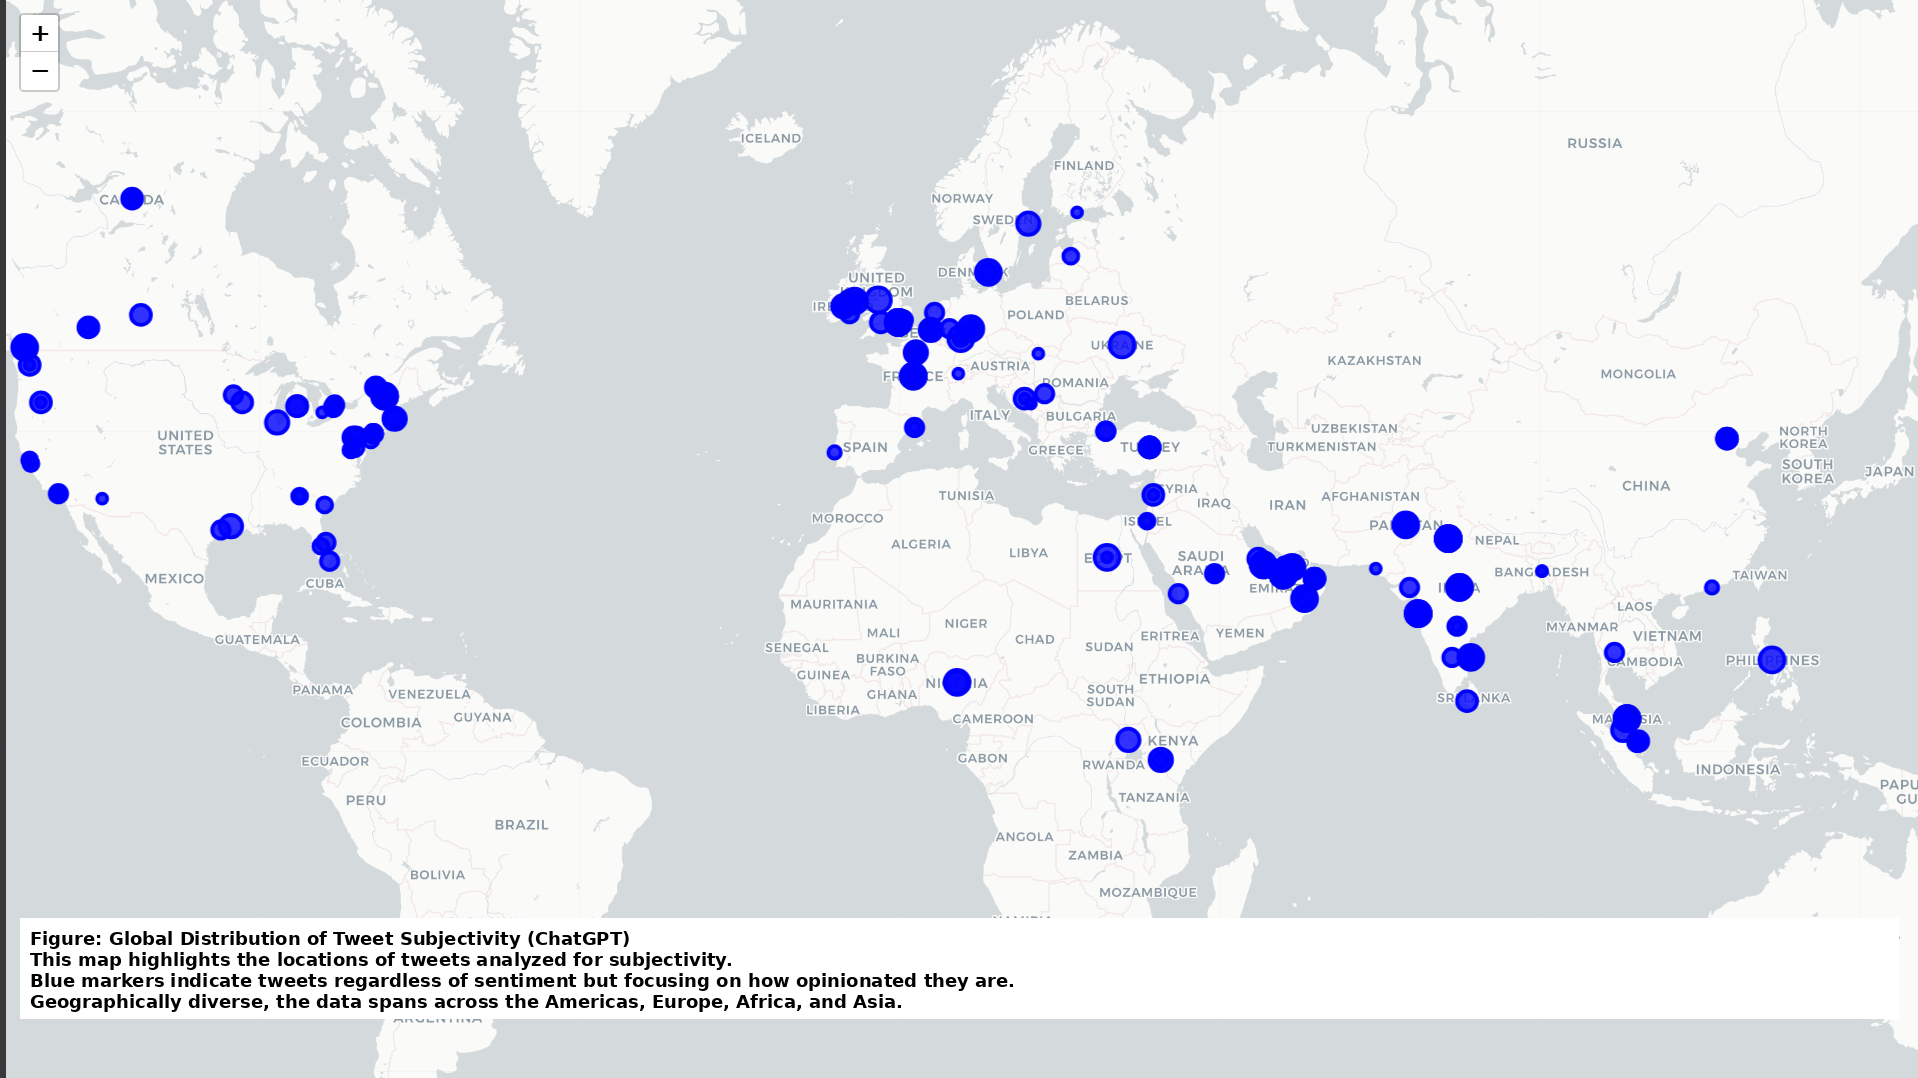

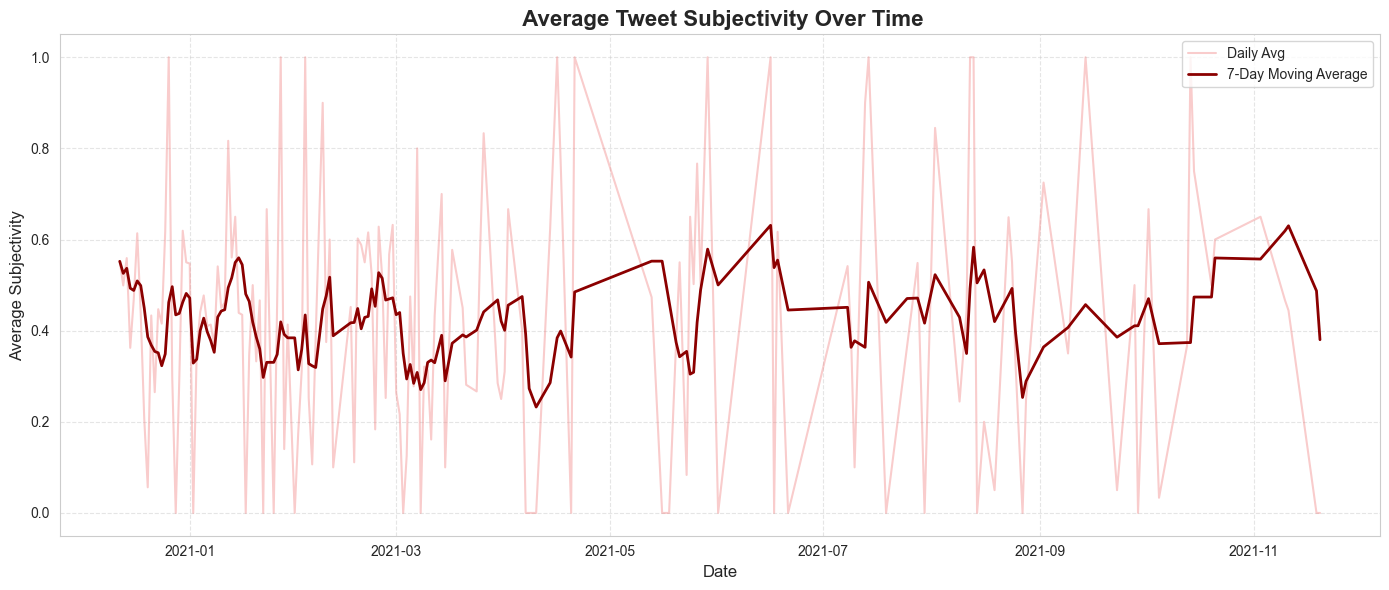

In [44]:
# Set visual style
sns.set_style("whitegrid")

# Calculate daily average (already done)
tweets_df['date'] = pd.to_datetime(tweets_df['date'])
daily_subjectivity = tweets_df.groupby(tweets_df['date'].dt.date)['subjectivity'].mean()

# smoothing using rolling average (7-day)
smoothed = daily_subjectivity.rolling(window=7, min_periods=1).mean()

# Plot
plt.figure(figsize=(14, 6))
plt.plot(daily_subjectivity.index, daily_subjectivity.values, label='Daily Avg', color='lightcoral', alpha=0.4)
plt.plot(smoothed.index, smoothed.values, label='7-Day Moving Average', color='darkred', linewidth=2)

# Titles and labels
plt.title(' Average Tweet Subjectivity Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Subjectivity', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

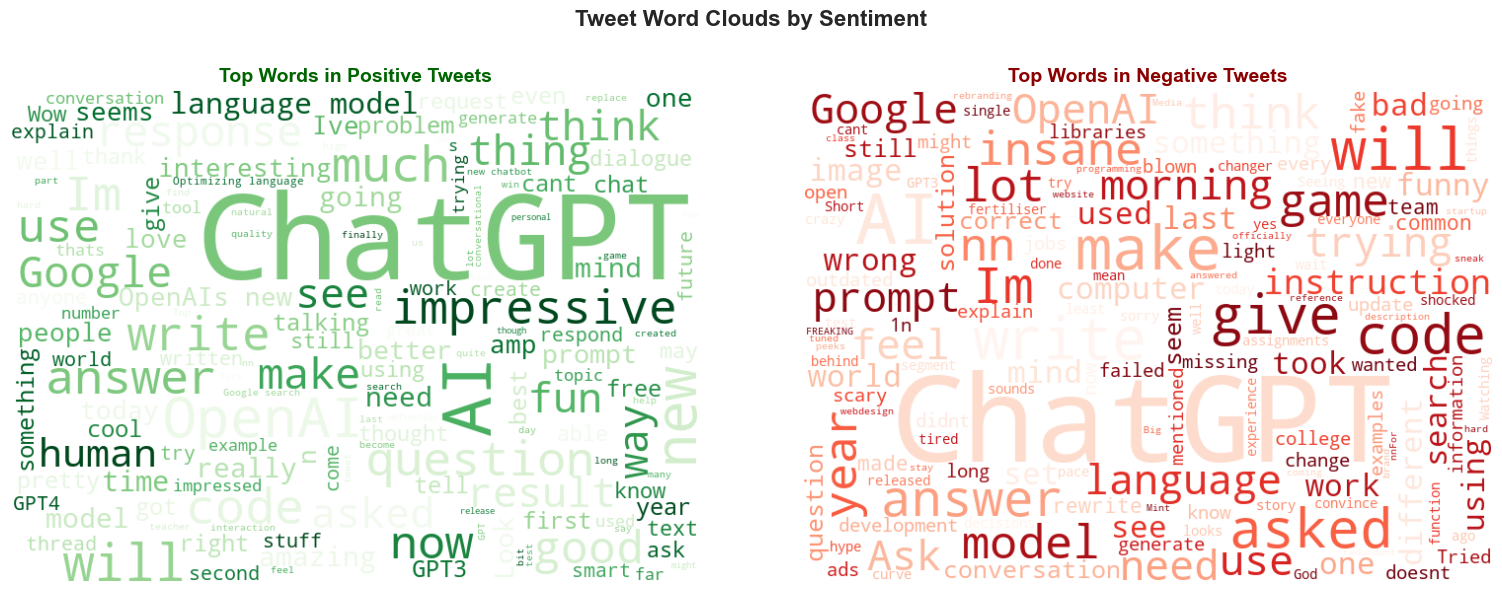

In [45]:
# Generate combined text for polarity
positive_text = ' '.join(tweets_df[tweets_df['polarity'] > 0]['clean_text'])
negative_text = ' '.join(tweets_df[tweets_df['polarity'] < 0]['clean_text'])

# Generate word clouds
wc_pos = WordCloud(
    width=700,
    height=500,
    background_color='white',
    colormap='Greens',
    max_words=150,
    contour_color='darkgreen',
    contour_width=1
).generate(positive_text)

wc_neg = WordCloud(
    width=700,
    height=500,
    background_color='white',
    colormap='Reds',
    max_words=150,
    contour_color='darkred',
    contour_width=1
).generate(negative_text)

# Plot side-by-side
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Positive
ax[0].imshow(wc_pos, interpolation='bilinear')
ax[0].axis('off')
ax[0].set_title('Top Words in Positive Tweets', fontsize=14, fontweight='bold', color='darkgreen')

# Negative
ax[1].imshow(wc_neg, interpolation='bilinear')
ax[1].axis('off')
ax[1].set_title('Top Words in Negative Tweets', fontsize=14, fontweight='bold', color='darkred')

plt.suptitle("Tweet Word Clouds by Sentiment", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

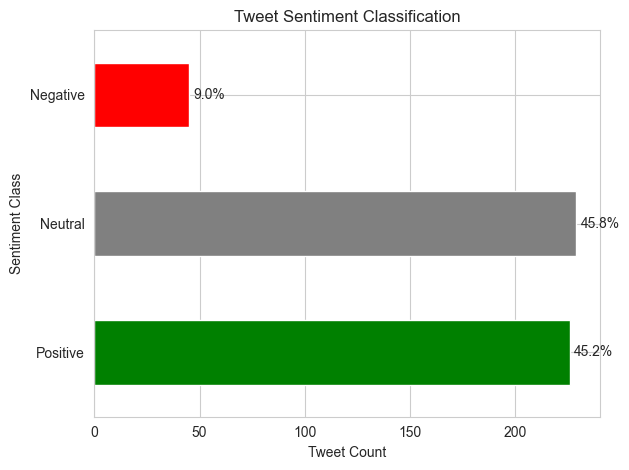

In [46]:
# sentiment classes defined
def classify(p):
    if p > 0.1:
        return 'Positive'
    elif p < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

tweets_df['sentiment_class'] = tweets_df['polarity'].apply(classify)

# Count sentiment classes
sentiment_counts = tweets_df['sentiment_class'].value_counts()
total = sentiment_counts.sum()

# Define colors by label order
colors = {'Positive': 'green', 'Neutral': 'gray', 'Negative': 'red'}
ordered_labels = ['Positive', 'Neutral', 'Negative']
sentiment_counts = sentiment_counts.reindex(ordered_labels)

# Plot horizontal bar chart
ax = sentiment_counts.plot(kind='barh', color=[colors[label] for label in sentiment_counts.index])
plt.title('Tweet Sentiment Classification')
plt.xlabel('Tweet Count')
plt.ylabel('Sentiment Class')

# Add percentage labels on bars
for i, (label, count) in enumerate(sentiment_counts.items()):
    percent = (count / total) * 100
    plt.text(count + 2, i, f'{percent:.1f}%', va='center', fontsize=10)

plt.tight_layout()
plt.show()

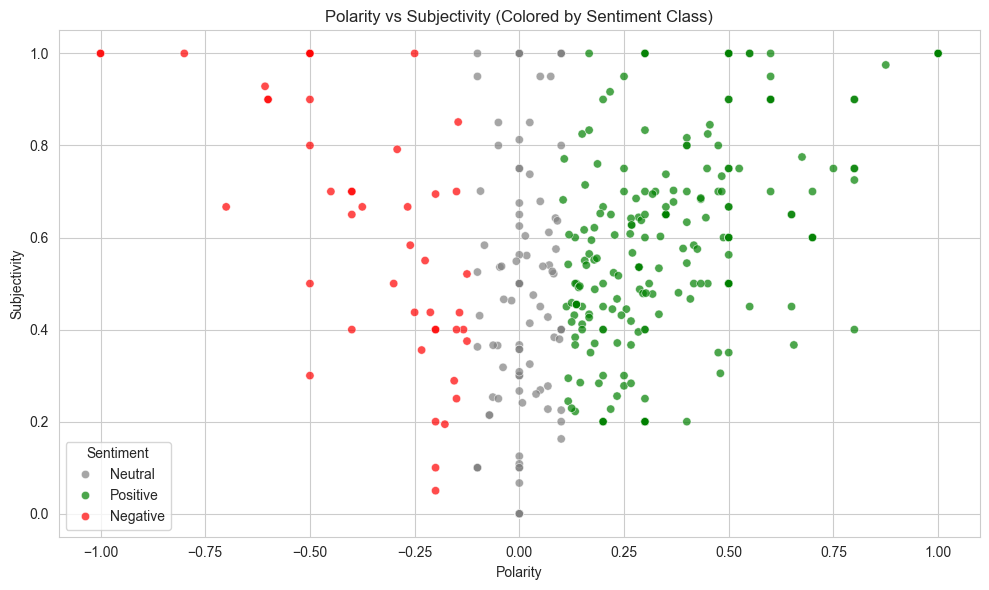

In [47]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='polarity',
    y='subjectivity',
    hue='sentiment_class',
    data=tweets_df,
    palette={'Positive': 'green', 'Neutral': 'gray', 'Negative': 'red'},
    alpha=0.7
)

plt.title('Polarity vs Subjectivity (Colored by Sentiment Class)')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.grid(True)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

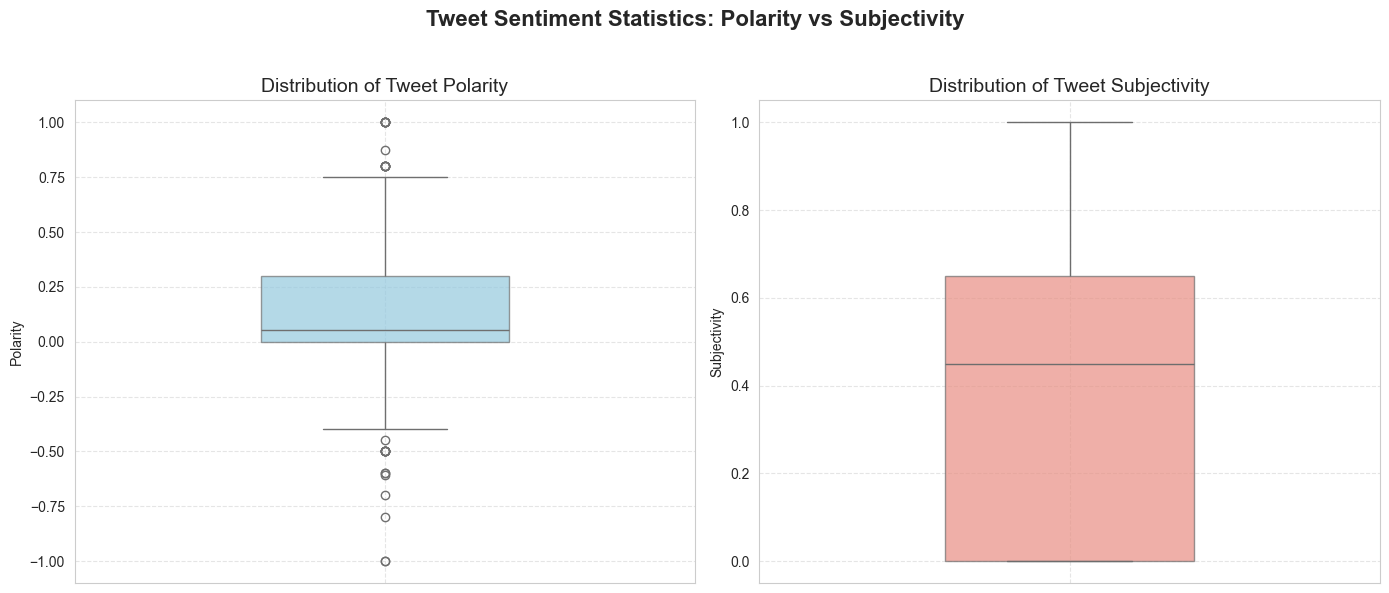

In [48]:

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Polarity boxplot
sns.boxplot(
    y=tweets_df['polarity'],
    ax=ax[0],
    color='skyblue',
    width=0.4,
    boxprops=dict(alpha=0.7)
)
ax[0].set_title('Distribution of Tweet Polarity', fontsize=14)
ax[0].set_ylabel('Polarity')
ax[0].set_xlabel('')
ax[0].grid(True, linestyle='--', alpha=0.5)

# Subjectivity boxplot
sns.boxplot(
    y=tweets_df['subjectivity'],
    ax=ax[1],
    color='salmon',
    width=0.4,
    boxprops=dict(alpha=0.7)
)
ax[1].set_title('Distribution of Tweet Subjectivity', fontsize=14)
ax[1].set_ylabel('Subjectivity')
ax[1].set_xlabel('')
ax[1].grid(True, linestyle='--', alpha=0.5)

# Adjust layout
plt.suptitle("Tweet Sentiment Statistics: Polarity vs Subjectivity", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

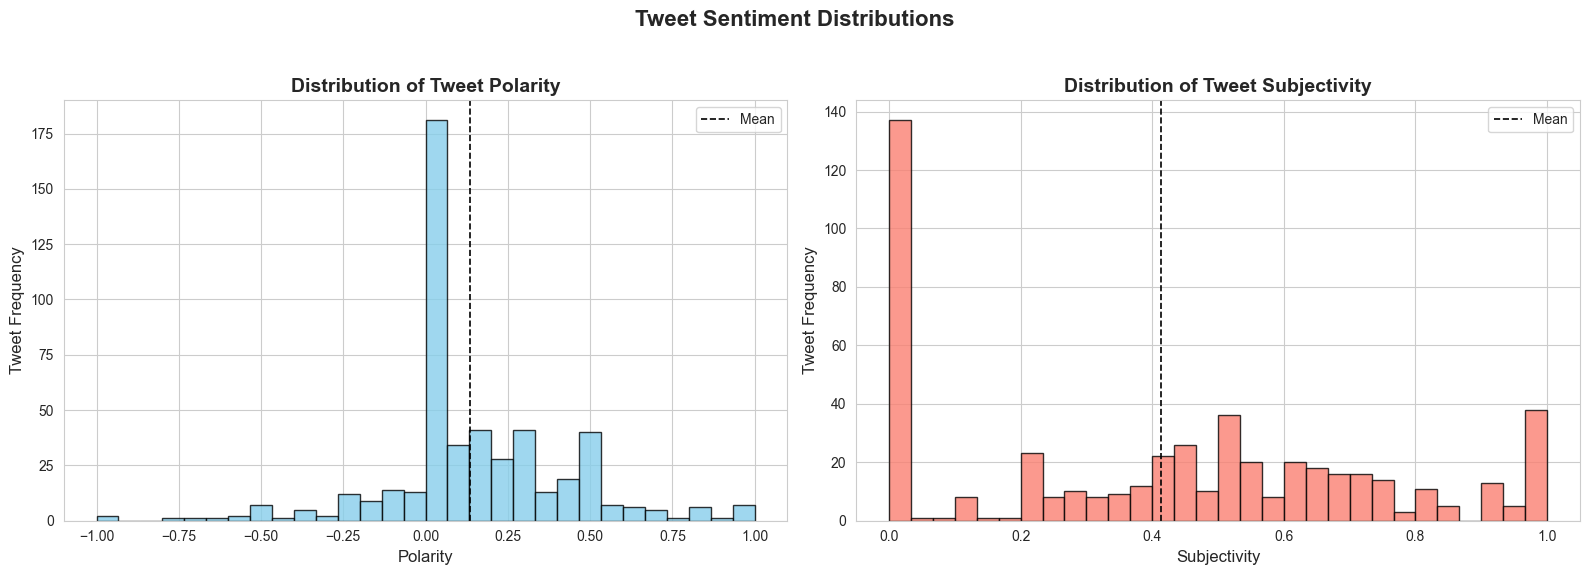

In [49]:
# Set plot style
sns.set_style("whitegrid")

# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Polarity histogram
ax1.hist(tweets_df['polarity'], bins=30, color='skyblue', edgecolor='black', alpha=0.8)
ax1.set_title('Distribution of Tweet Polarity', fontsize=14, fontweight='bold')
ax1.set_xlabel('Polarity', fontsize=12)
ax1.set_ylabel('Tweet Frequency', fontsize=12)
ax1.axvline(tweets_df['polarity'].mean(), color='black', linestyle='dashed', linewidth=1.2, label='Mean')
ax1.legend()

# Subjectivity histogram
ax2.hist(tweets_df['subjectivity'], bins=30, color='salmon', edgecolor='black', alpha=0.8)
ax2.set_title('Distribution of Tweet Subjectivity', fontsize=14, fontweight='bold')
ax2.set_xlabel('Subjectivity', fontsize=12)
ax2.set_ylabel('Tweet Frequency', fontsize=12)
ax2.axvline(tweets_df['subjectivity'].mean(), color='black', linestyle='dashed', linewidth=1.2, label='Mean')
ax2.legend()

# Overall layout
plt.suptitle("Tweet Sentiment Distributions", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#Geospatial Sentiment Insights on ChatGPT — Advisory Report (Task 3.5)

The dataset used for this study consists of 500 geocoded and sentiment-assessed tweets from verified Twitter users with substantial followership, giving this research a rare opportunity to track global public opinion across regions. Sentiments were analyzed on the basis of good filtering and cleansing so that user perspectives from verifiable locations would enter final consideration.
<br>
<br>
### **Sentiment Overview**
Sentiment around the world is definitely positive toward ChatGPT, with some distinct clusters showing highly positive sentiment across different regions including North America, Western Europe, parts of Southeast Asia, and South America. The US, Canada, the UK, Germany, Brazil, and India have all evidenced high frequencies of appreciation for ChatGPT's abilities-e.g. natural language generation, productivity improvement, and ease of use-inferred through comments made by netizens and the frequency at which the program is searched in these countries. These regions thus demonstrate a tech-savvy, urban body that tends to engage in thoughtful yet often spirited discussion. Van vrynargal nucles.

The negativity was sporadic rather than regionally concentrated. Very few geolocated tweets from certain parts of Africa and the Middle East showed negative or skeptical polarity. Most of those concerns revolved around data privacy, misuse of AI, and risks of misinformation. Such conclusions, however, should be made with caution, since only a handful of tweets were available from some jurisdictions, especially from those where geotagged Twitter usage is low.
<br>
<br>
### **Subjectivity Landscape**
Analysis of subjectivity showed that a lot of tweets, irrespective of polarity, were somewhat subjective, which means that in most cases, users would prefer to express opinions rather than facts. It follows that, by all indications, public sentiment towards ChatGPT continues to rely largely on emotions and opinions flowing from individual experiences, media stories, and cultural disposition to automation or indeed, to AI.

A more wordy variant or paraphrasing: While in contrast, high subjectivity and positive polarity themed clusters were mainly found in the English-speaking world because of technological beneficiaries who lauded ChatGPT's prowess in writing, summarizing, and coding. On the other extreme, subjectivity markers that are lower are found with negative polarity in tweets that quote concrete concerns such as misuse in academia, taking away jobs, or hallucinations.
<br>
<br>
###**Actionable Insight & Recommendations**
As the AI development competition, the data gives some high strategic signals below:

* Highly positive regions with a slightly optimistic attitude signal a very lucrative market and can be penetrated with feature-heavy, user-friendly AI alternatives.

* Low volume and high negativity areas need to be actively monitored; in certain cultures or ethical traditions, skepticism is a roadblock that your product may, in fact, preemptively address.

* Twitter posts tend to be highly subjective and may not exhibit consolidated public sentiment but instead are a good early-warning signal for the emergence of narratives or concerns.
<br>


###**Conclusion**
This shows that this kind of analysis, being inherently noisy and someday exclusive for Twitter sentiment data, will have ChatGPT viewed favorably around the world with precise opportunity areas and loud caution signals. Such competitive advantage for chatters will have to be hastened in attractive positive markets and watched for noticeable outliers to differentiate with transparency, local trust development, and responsible AI messaging.